In [71]:
# Reading the transaction history dataset
import pandas as pd
transaction = pd.read_csv("sm_transaction_history.csv")
#Splitting the data separated with  ";"
transaction= transaction.iloc[:,0].str.split(';', expand=True)
#Reading the 21 first columns only to eliminate the None
transaction = transaction.iloc[:,0:21]
#Giving proper names to columns as provided in the dataset
transaction.columns = ["transaction_date","transaction_id","receipt_no","teller_id","batch_number","provider_id","transaction_amount","total_provider_amount","commission","vat","currency","mode_of_payt","pay_ref_no","slip_no","drawers_bank","transaction_status","mca_receipt_no","auto_active_retry","active_return_msg","handled_by","handled_at"]
# Removing the double quotes
for i in range(0,21):
    transaction.iloc[:,i]=transaction.iloc[:,i].str.replace(r"[\"]", '')
# Dropping all NAs
transaction = transaction.dropna()
#reindex
transaction=transaction.reset_index(drop=True)
#changing transaction_id to int64
transaction['transaction_id'] = pd.to_numeric(transaction['transaction_id'])
transaction.info()

C:\Users\Lise Kabarere\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (2,3,4,5,6,7,9,12,15) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135411 entries, 0 to 135410
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   transaction_date       135411 non-null  object
 1   transaction_id         135411 non-null  int64 
 2   receipt_no             135411 non-null  object
 3   teller_id              135411 non-null  object
 4   batch_number           135411 non-null  object
 5   provider_id            135411 non-null  object
 6   transaction_amount     135411 non-null  object
 7   total_provider_amount  135411 non-null  object
 8   commission             135411 non-null  object
 9   vat                    135411 non-null  object
 10  currency               135411 non-null  object
 11  mode_of_payt           135411 non-null  object
 12  pay_ref_no             135411 non-null  object
 13  slip_no                135411 non-null  object
 14  drawers_bank           135411 non-null  object
 15  

In [69]:
# reading the subscription orders dataset
subscription_data = pd.read_excel("sm_subscriber_orders.xlsx")
subscription_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178077 entries, 0 to 178076
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   oder_id           178077 non-null  int64         
 1   transaction_id    178077 non-null  int64         
 2   transaction_date  178077 non-null  datetime64[ns]
 3   transaction_type  178077 non-null  object        
 4   account_number    178003 non-null  object        
 5   provider_id       178077 non-null  int64         
 6   product_id        174280 non-null  float64       
 7   duration          178073 non-null  float64       
 8   product_price     178077 non-null  int64         
 9   provider_price    178077 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(5), object(2)
memory usage: 13.6+ MB


In [75]:
# merging the 2 datasets
new_df = pd.merge(transaction, subscription_data, on = 'transaction_id',left_index=True, right_index=True)
new_df

,transaction_date_x,transaction_id,receipt_no,teller_id,batch_number,provider_id_x,transaction_amount,total_provider_amount,commission,vat,...,handled_at,oder_id,transaction_date_y,transaction_type,account_number,provider_id_y,product_id,duration,product_price,provider_price
0,2014-06-02 13:28:16,401400001,10201400001,140602001,6,1,135300.00,119,2890.00,0,...,2014-06-02 14:17:16,1,2014-06-02 13:28:00,equipment,4288697398,1,15.0,1.0,61300,35
1,2014-06-02 13:34:17,401400002,10201400002,140602003,1,3,53000.00,46892,779.00,0,...,2014-06-02 14:30:45,2,2014-06-02 13:28:00,equipment,4288697398,1,5.0,1.0,74000,84
2,2014-06-02 15:06:19,401400003,10201400003,140602006,3,3,53000.00,46892,779.00,0,...,2014-06-02 15:17:40,3,2014-06-02 13:34:00,equipment,140473000000,3,28.0,1.0,30000,27400
3,2014-06-02 15:12:42,401400004,10201400004,140602006,3,3,52500.00,46468,254.00,0,...,2014-06-02 15:23:31,4,2014-06-02 13:34:00,equipment,140473000000,3,26.0,1.0,23000,19492
4,2014-06-02 15:18:13,401400005,10201400005,140602008,8,3,16000.00,0,542.00,0,...,2014-06-02 15:25:13,5,2014-06-02 15:06:00,equipment,140473000000,3,28.0,1.0,30000,27400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135406,2021-04-13 12:12:40,401535832,10201535832,140602001,12500,1,44500.00,36,1041.00,0,...,2021-04-13 12:20:03,135407,2018-12-08 14:33:00,subscription,4122131736,1,5.0,1.0,94000,82
135407,2021-04-13 12:38:50,401535833,10201535833,140602240,12460,1,100500.00,82,3526.00,0,...,2021-04-13 12:45:03,135408,2018-12-08 14:34:00,subscription,10254684185,1,5.0,1.0,94000,82
135408,2021-04-13 13:14:30,401535834,10201535834,140602283,12502,1,40000.00,32,869.00,0,...,2021-04-13 13:20:04,135409,2018-12-08 14:34:00,equipment,7021877227,1,NaN,1.0,0,0
135409,2021-04-13 14:42:38,401535835,10201535835,140602297,12498,1,31000.00,25,0.00,0,...,2021-04-13 14:50:04,135410,2018-12-08 14:34:00,equipment,7021877227,1,157.0,1.0,14900,13


In [85]:
clients = new_df.groupby(['account_number', 'teller_id']).sum()
clients

transaction_id  oder_id  provider_id_y  product_id  \
account_number teller_id                                                       
0.101342664    140602008       401444234    44192              1         5.0   
               140602016      1605809072   208868              4        91.0   
               140602043       401447309    47264              1         5.0   
200            140602017       401428971    28944              1        80.0   
2407           140602017       401433992    33964              1        80.0   
...                                  ...      ...            ...         ...   
v104882961x5   140602021       401531943   131520              1         3.0   
               140602243       401531944   131521              1         3.0   
               140602259       401530941   130518              1         3.0   
v104882965x8   140602017       401418109    18084              1        73.0   
               140602043       401418110    18085              1         1.0   

                          duration  product_price  provider_price  
account_number teller_id                                           
0.101342664    140602008       1.0          81400              84  
               140602016       4.0          91730              84  
               140602043       1.0          89800              88  
200            140602017       2.0            100               0  
2407           140602017       4.0            100               0  
...                            ...            ...             ...  
v104882961x5   140602021       1.0          28700              25  
               140602243       1.0          28700              25  
               140602259       1.0          28700              25  
v104882965x8   140602017       1.0              0               0  
               140602043       1.0           9600              11  

[56939 rows x 7 columns]

In [2]:
transaction.isna().sum()

transaction_date         0
transaction_id           0
receipt_no               0
teller_id                0
batch_number             0
provider_id              0
transaction_amount       0
total_provider_amount    0
commission               0
vat                      0
currency                 0
mode_of_payt             0
pay_ref_no               0
slip_no                  0
drawers_bank             0
transaction_status       0
mca_receipt_no           0
auto_active_retry        0
active_return_msg        0
handled_by               0
handled_at               0
dtype: int64

In [3]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135411 entries, 0 to 135410
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   transaction_date       135411 non-null  object
 1   transaction_id         135411 non-null  object
 2   receipt_no             135411 non-null  object
 3   teller_id              135411 non-null  object
 4   batch_number           135411 non-null  object
 5   provider_id            135411 non-null  object
 6   transaction_amount     135411 non-null  object
 7   total_provider_amount  135411 non-null  object
 8   commission             135411 non-null  object
 9   vat                    135411 non-null  object
 10  currency               135411 non-null  object
 11  mode_of_payt           135411 non-null  object
 12  pay_ref_no             135411 non-null  object
 13  slip_no                135411 non-null  object
 14  drawers_bank           135411 non-null  object
 15  

In [4]:
#Grouping clients
clients = transaction.sort_values(by=['provider_id'])
clients

,transaction_date,transaction_id,receipt_no,teller_id,batch_number,provider_id,transaction_amount,total_provider_amount,commission,vat,...,mode_of_payt,pay_ref_no,slip_no,drawers_bank,transaction_status,mca_receipt_no,auto_active_retry,active_return_msg,handled_by,handled_at
123985,2020-02-21 18:20:56,401524402,10201524402,140602093,10824,0,0.00,0,0.00,0,...,0,NULL,NULL,NULL,on hold,0,0,NULL,31052014301,2020-02-21 18:31:36
125226,2020-03-20 17:15:25,401525648,10201525648,140602166,4321,0,0.00,0,0.00,0,...,1,NULL,NULL,NULL,on hold,0,0,NULL,31052014006,2020-03-20 18:20:11
121767,2020-01-02 18:12:21,401522167,10201522167,140602093,10658,0,0.00,0,0.00,0,...,0,NULL,NULL,NULL,on hold,0,0,NULL,31052014301,2020-01-03 16:37:19
0,2014-06-02 13:28:16,401400001,10201400001,140602001,6,1,135300.00,119,2890.00,0,...,1,NULL,,NULL,activated,0,0,NULL,31052014007,2014-06-02 14:17:16
88925,2018-03-21 10:01:16,401489051,10201489051,140602255,7431,1,94000.00,82,3526.00,0,...,6,25445456+,Tele10 Limited(04),405,activated,80366528,0,NULL,AUTOACT,2018-03-21 10:10:05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111917,2019-06-08 17:30:36,401512233,10201512233,140602249,9748,3,22000.00,19492,633.00,0,...,1,NULL,NULL,NULL,activated,0,0,NULL,31052014301,2019-06-08 17:46:17
22506,2014-12-04 17:25:40,401422532,10201422532,140602043,2031,3,23000.00,19492,779.00,0,...,6,16686,Tele10 Limited(04),405,activated,0,0,NULL,31052014008,2014-12-04 18:11:32
22507,2014-12-04 17:27:06,401422533,10201422533,140602043,2031,3,32000.00,27119,1085.00,0,...,6,166854,Tele10 Limited(04),405,activated,0,0,NULL,31052014008,2014-12-04 18:12:45
55015,2016-04-29 13:46:15,401455072,10201455072,140602115,4419,3,7000.00,0,0.00,0,...,7,100012916,NULL,NULL,activated,0,0,NULL,31052014005,2016-04-29 14:26:30


In [24]:
transaction["commission"].unique()

array(['2890.00', '779.00', '254.00', '542.00', '1186.00', '0.00',
       '1085.00', '2169.00', '407.00', '237.00', '3297.00', '2422.00',
       '525.00', '375.00', '1789.00', '3750.00', '949.00', '1575.00',
       '1763.00', '758.00', '1035.00', '2829.00', '898.00', '2196.00',
       '644.00', '757.00', '1238.00', '881.00', '1550.00', '2473.00',
       '3405.00', '3812.00', '1492.00', '4971.00', '3398.00', '7204.00',
       '4157.00', '3186.00', '515.00', '2066.00', '3921.00', '1272.00',
       '2820.00', '2779.00', '1831.00', '1271.00', '4564.00', '1965.00',
       '3704.00', '12704.00', '1305.00', '2508.00', '4111.00', '2304.00',
       '1031.00', '814.00', '4212.00', '339.00', '3643.00', '3236.00',
       '5983.00', '1424.00', '4882.00', '1288.00', '1442.00', '1849.00',
       '1571.00', '1645.00', '3227.00', '2819.00', '312.00', '4735.00',
       '2576.00', '21340.00', '2306.00', '4328.00', '4555.00', '3805.00',
       '1118.00', '782.00', '746.00', '4518.00', '1593.00', '4952.00'

In [6]:
# Converting to datetime
transaction['transaction_date'] = pd.to_datetime(transaction['transaction_date'], format='%Y-%m-%d %H:%M:%S')
transaction

,transaction_date,transaction_id,receipt_no,teller_id,batch_number,provider_id,transaction_amount,total_provider_amount,commission,vat,...,mode_of_payt,pay_ref_no,slip_no,drawers_bank,transaction_status,mca_receipt_no,auto_active_retry,active_return_msg,handled_by,handled_at
0,2014-06-02 13:28:16,401400001,10201400001,140602001,6,1,135300.00,119,2890.00,0,...,1,NULL,,NULL,activated,0,0,NULL,31052014007,2014-06-02 14:17:16
1,2014-06-02 13:34:17,401400002,10201400002,140602003,1,3,53000.00,46892,779.00,0,...,1,NULL,,NULL,activated,0,0,NULL,31052014007,2014-06-02 14:30:45
2,2014-06-02 15:06:19,401400003,10201400003,140602006,3,3,53000.00,46892,779.00,0,...,1,NULL,,NULL,activated,0,0,NULL,31052014007,2014-06-02 15:17:40
3,2014-06-02 15:12:42,401400004,10201400004,140602006,3,3,52500.00,46468,254.00,0,...,1,NULL,,NULL,activated,0,0,NULL,31052014007,2014-06-02 15:23:31
4,2014-06-02 15:18:13,401400005,10201400005,140602008,8,3,16000.00,0,542.00,0,...,1,NULL,,NULL,activated,0,0,NULL,31052014005,2014-06-02 15:25:13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135406,2021-04-13 12:12:40,401535832,10201535832,140602001,12500,1,44500.00,36,1041.00,0,...,1,NULL,NULL,NULL,activated,165906,0,NULL,AUTOACT,2021-04-13 12:20:03
135407,2021-04-13 12:38:50,401535833,10201535833,140602240,12460,1,100500.00,82,3526.00,0,...,1,NULL,NULL,NULL,activated,165912,0,NULL,AUTOACT,2021-04-13 12:45:03
135408,2021-04-13 13:14:30,401535834,10201535834,140602283,12502,1,40000.00,32,869.00,0,...,1,NULL,NULL,NULL,activated,165895,0,NULL,AUTOACT,2021-04-13 13:20:04
135409,2021-04-13 14:42:38,401535835,10201535835,140602297,12498,1,31000.00,25,0.00,0,...,1,NULL,NULL,NULL,activated,165967,0,NULL,AUTOACT,2021-04-13 14:50:04


In [8]:
transaction['transaction_amount'] = pd.to_numeric(transaction['transaction_amount'])
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135411 entries, 0 to 135410
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   transaction_date       135411 non-null  datetime64[ns]
 1   transaction_id         135411 non-null  object        
 2   receipt_no             135411 non-null  object        
 3   teller_id              135411 non-null  object        
 4   batch_number           135411 non-null  object        
 5   provider_id            135411 non-null  object        
 6   transaction_amount     135411 non-null  float64       
 7   total_provider_amount  135411 non-null  object        
 8   commission             135411 non-null  object        
 9   vat                    135411 non-null  object        
 10  currency               135411 non-null  object        
 11  mode_of_payt           135411 non-null  object        
 12  pay_ref_no             135411 non-null  obje

In [13]:
transaction['months'] = transaction['transaction_date'].dt.month
avPerMonth = transaction.groupby('months')['transaction_amount'].mean()
avPerMonth 

months
1     83374.021252
2     76856.633829
3     70136.714388
4     67195.313528
5     73990.379170
6     58348.703337
7     63889.086780
8     65911.757819
9     78699.441259
10    69575.986293
11    77268.469205
12    72277.984179
Name: transaction_amount, dtype: float64

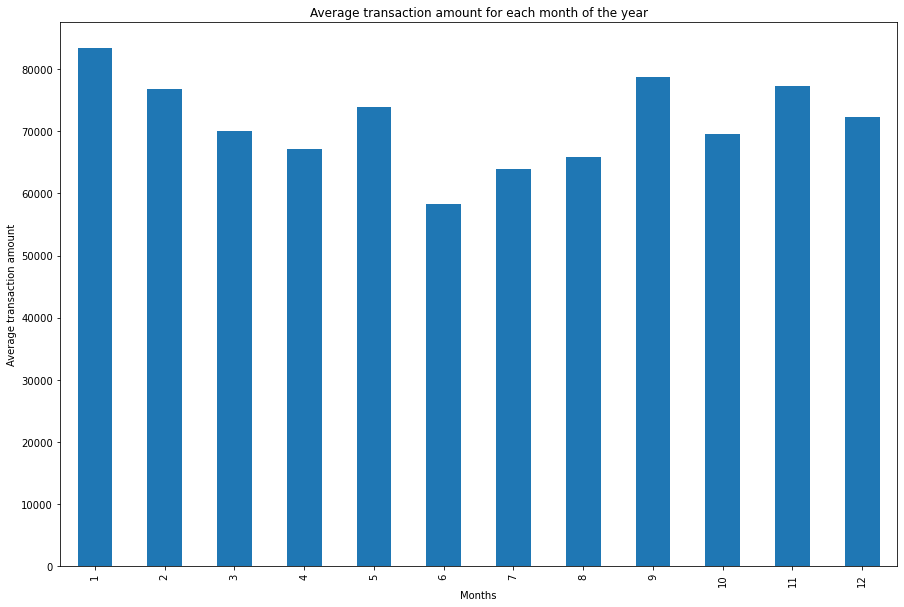

In [63]:
import matplotlib.pyplot as plt
# Bar chart of the average demand for each month of the year
avPerMonth.plot.bar(figsize=(15,10))
plt.title('Average transaction amount for each month of the year')
plt.xlabel('Months')
plt.ylabel('Average transaction amount')
plt.show()

In [15]:
transaction['hours'] = transaction['transaction_date'].dt.hour
avPerHour = transaction.groupby('hours')['transaction_amount'].mean()
avPerHour

hours
0     34766.666667
1     43900.000000
2     30600.000000
3     23487.500000
4     21992.857143
5     49693.000000
6     30056.000000
7     37295.806452
8     60704.955975
9     81264.906175
10    83693.775016
11    80047.035850
12    74809.838583
13    66867.028972
14    72770.035404
15    74859.731565
16    75363.420229
17    67992.563654
18    56868.392187
19    56070.078653
20    51355.433556
21    41098.969697
22    39803.728814
23    49452.736842
Name: transaction_amount, dtype: float64

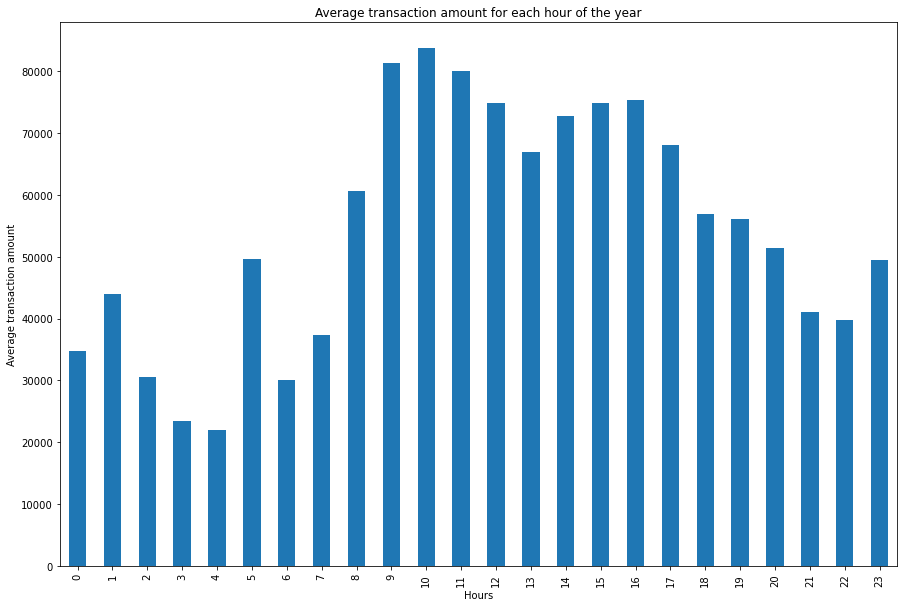

In [64]:
# Bar chart of the average demand for each hour of the year
avPerHour.plot.bar(figsize=(15,10))
plt.title('Average transaction amount for each hour of the year')
plt.xlabel('Hours')
plt.ylabel('Average transaction amount')
plt.show()

In [18]:
transaction['days'] = transaction['transaction_date'].dt.dayofweek
avPerDay = transaction.groupby('days')['transaction_amount'].mean()
avPerDay

days
0    71460.508027
1    72817.643244
2    76547.736065
3    75895.501983
4    71213.960229
5    64799.793444
6    49836.723582
Name: transaction_amount, dtype: float64

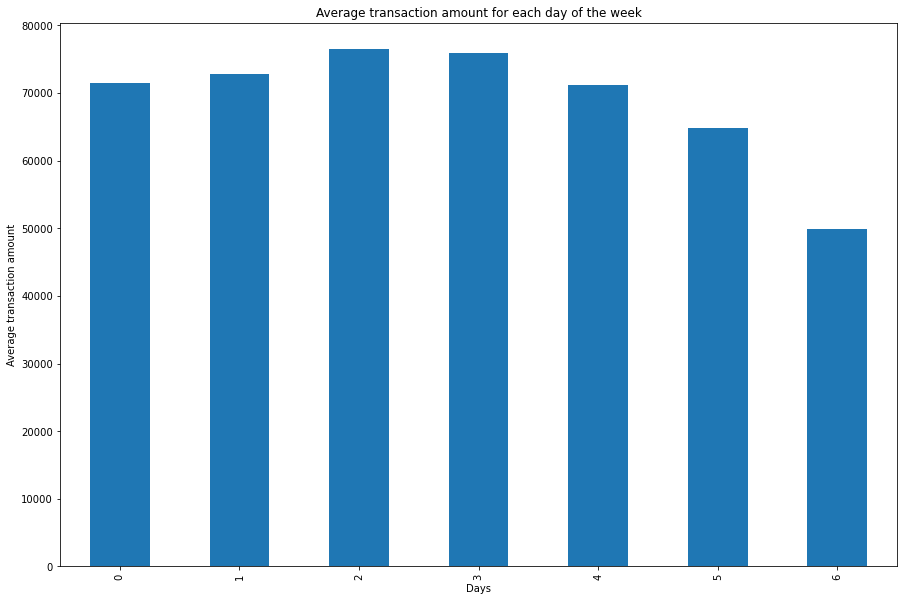

In [19]:
# Bar chart of the average demand for each hour of the year
avPerDay.plot.bar(figsize=(15,10))
plt.title('Average transaction amount for each day of the week')
plt.xlabel('Days')
plt.ylabel('Average transaction amount')
plt.show()

In [29]:
#calculating the revenue
transaction['total_provider_amount'] = pd.to_numeric(transaction['total_provider_amount'])
transaction['commission'] = pd.to_numeric(transaction['commission'])
transaction ['sales'] = transaction['transaction_amount'] - transaction['commission'] - transaction['total_provider_amount']
transaction ['sales']

0         132291.0
1           5329.0
2           5329.0
3           5778.0
4          15458.0
            ...   
135406     43423.0
135407     96892.0
135408     39099.0
135409     30975.0
135410     96892.0
Name: sales, Length: 135411, dtype: float64

In [62]:
#sales
import numpy as np

transaction['years'] = transaction['transaction_date'].dt.year
transactionsPerYear = transaction.groupby('years')['sales'].sum()
print(transactionsPerYear[-1:])

#modeling
years = np.array([2014, 2015, 2016, 2017, 2018, 2019, 2020])
years

#Importing the Sklearn library
from sklearn.svm import SVR
#SVM regression model
model = SVR(C=1.0, epsilon=0.2).fit(years.reshape(-1, 1),transactionsPerYear[:-1])
sales_pred = model.predict(np.array([2021]).reshape(-1, 1))
sales_pred[0] #Predicted amount of revenue for the year 2021

years
2021    163732802.0
Name: sales, dtype: float64


years
2021    1.182753e+09
Name: sales, dtype: float64